In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import emoji
%matplotlib inline 

#importing rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit import RDConfig
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
#from utility import FeatureGenerator
from rdkit.Chem import PandasTools as PandasTools
from rdkit import DataStructs
from rdkit.Chem.Subshape import SubshapeBuilder,SubshapeAligner,SubshapeObjects

#importing sklearn 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import pandas as pd
from mordred import Calculator, descriptors
import wget
import unzip
import padelpy

In [2]:
from rdkit.Chem import AllChem
from rdkit import Chem
import pandas as pd

sol = pd.read_csv('D:/python/rdkit/new222new.csv')
print(sol.head)
XY = sol.set_index('SMILES').T.to_dict('list')

<bound method NDFrame.head of                                                  SMILES  \
0               OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O   
1     O[C@H]1[C@H](O[C@H](CO)[C@@H](O)[C@@H]1O)O[C@]...   
2     OC[C@@H]1O[C@](CO)(O[C@@H]2O[C@@H](CO)[C@H](O)...   
3                CN1C[C@@H]2C[C@@H](C1)C3=CC=CC(=O)N3C2   
4                          CN1CC2CC(C1)C1=CC=CC(=O)N1C2   
...                                                 ...   
8433                                      O=[N+]([O-])C   
8434                                                 OC   
8435                                            S=C(N)N   
8436                                           O=C(NO)N   
8437                                            O=C(N)N   

      measured log(solubility:mol/L)  
0                               0.79  
1                               0.79  
2                               0.79  
3                               0.65  
4                               0.65  
...                        

In [3]:
Y = sol.iloc[:,1]
Y

0       0.79
1       0.79
2       0.79
3       0.65
4       0.65
        ... 
8433    0.26
8434    1.57
8435    0.32
8436    1.12
8437    0.96
Name: measured log(solubility:mol/L), Length: 8438, dtype: float64

In [4]:
#descriptor
molecules = sol.SMILES.apply(Chem.MolFromSmiles)

In [5]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=True)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df

In [6]:
mordred_descriptors = All_Mordred_descriptors(sol['SMILES'])

100%|██████████████████████████████████████████████████████████████████████████████| 8438/8438 [06:50<00:00, 20.54it/s]


In [7]:
mordred_descriptors.shape

(8438, 1613)

In [48]:
X=mordred_descriptors 

In [42]:
#X.to_excel(r'D:/python/rdkit/experiments.xlsx', index = False)

In [49]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold()

In [50]:
des_num = X.select_dtypes(include='number')
des_num.shape

(8438, 811)

In [51]:
transformed = vt.fit_transform(des_num)


In [52]:
_ = vt.fit(des_num)

mask = vt.get_support()


In [53]:
des_num = des_num.loc[:, mask]


In [54]:
vt = VarianceThreshold(threshold=0.1)

# Fit
_ = vt.fit(des_num)

# Get the boolean mask
mask = vt.get_support()

des_reduced = des_num.loc[:, mask]
H=des_reduced
#X=H.drop(['FilterItLogS', 'SLogP'], axis=1)
X=H
X.shape

(8438, 506)

In [55]:
correlated_features = set()
correlation_matrix=X.corr()

In [56]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [57]:
len(correlated_features)

328

In [18]:
print(correlated_features)

{'ATS1are', 'ATSC8se', 'ATSC1pe', 'ATS0i', 'Sse', 'TopoPSA(NO)', 'EState_VSA10', 'ATS6i', 'nFHRing', 'ATS8pe', 'SRW07', 'piPC5', 'ATSC8m', 'ATSC7m', 'ATS0v', 'ATSC7se', 'ATS4dv', 'Xp-7d', 'AATS1d', 'IC5', 'ATSC0v', 'ATSC0se', 'MIC1', 'ATS4m', 'IC3', 'ATS0pe', 'Xp-2d', 'ATS1d', 'n6aRing', 'ATS7are', 'ZMIC5', 'ATS1Z', 'nBondsKD', 'ATS2m', 'AATS1are', 'SssO', 'MWC09', 'ZMIC3', 'VSA_EState5', 'ATS8d', 'ATS3se', 'ATS1dv', 'ATS8i', 'NsBr', 'ATSC0p', 'AATS0pe', 'BertzCT', 'NsCl', 'ATSC2pe', 'AMW', 'Zagreb1', 'ATS2pe', 'CIC4', 'ZMIC4', 'ATS5dv', 'ATSC6are', 'AATS0m', 'AATS1pe', 'AATS0are', 'SsBr', 'TIC4', 'ATS0dv', 'SdO', 'SaaNH', 'ATS1i', 'ATSC2are', 'ATS2v', 'Xp-1d', 'SddsN', 'Xpc-5d', 'ATS8dv', 'SRW05', 'nBonds', 'Xpc-4dv', 'Radius', 'AATS1i', 'ATSC5m', 'MPC4', 'piPC8', 'ATSC0Z', 'AATS0se', 'WPol', 'CIC0', 'AATS0v', 'SssssC', 'MIC5', 'ATSC3m', 'ATS6dv', 'GGI1', 'ATS4v', 'SRW04', 'ATS7pe', 'NaaCH', 'ATS7dv', 'ATS0p', 'SsOH', 'MPC3', 'TMPC10', 'VSA_EState3', 'ATS4se', 'Xp-5dv', 'ATS5i', 'nBon

In [58]:
X.drop(labels=correlated_features, axis=1, inplace=True)

C:\Users\DEDP Grader\AppData\Local\Temp\ipykernel_4824\1003493426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(labels=correlated_features, axis=1, inplace=True)


In [59]:
X.drop('FilterItLogS', axis=1, inplace=True)

C:\Users\DEDP Grader\AppData\Local\Temp\ipykernel_4824\4124452189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('FilterItLogS', axis=1, inplace=True)


In [60]:
X.shape

(8438, 177)

In [22]:
X.head()

,ABC,nAcid,nBase,nAromAtom,nAtom,nBridgehead,nHetero,nC,nN,nO,...,n5aRing,naHRing,nARing,n5ARing,n6ARing,nAHRing,nFRing,nRot,Diameter,WPath
0,17.213262,0,0,0,45,0,11,12,0,11,...,0,0,2,1,1,2,0,5,10,1110
1,17.213262,0,0,0,45,0,11,12,0,11,...,0,0,2,1,1,2,0,5,10,1110
2,17.213262,0,0,0,45,0,11,12,0,11,...,0,0,2,1,1,2,0,5,10,1110
3,12.118275,0,1,6,31,2,3,12,2,1,...,0,1,2,0,2,2,1,0,7,322
4,12.118275,0,1,6,31,2,3,12,2,1,...,0,1,2,0,2,2,1,0,7,322


In [23]:
gf=set()

In [24]:
i=0
for i in range(len(X.columns)):
   
    colname = X.columns[i]
    gf.add(colname)

In [25]:
gf


{'AATS0d',
 'AATS0dv',
 'AATS0i',
 'AATSC0dv',
 'AATSC0i',
 'AATSC0v',
 'AATSC1Z',
 'ABC',
 'ATS0Z',
 'ATSC0i',
 'ATSC1Z',
 'ATSC1d',
 'ATSC1dv',
 'ATSC1i',
 'ATSC1p',
 'ATSC1se',
 'ATSC1v',
 'ATSC2Z',
 'ATSC2d',
 'ATSC2dv',
 'ATSC2i',
 'ATSC2se',
 'ATSC2v',
 'ATSC3Z',
 'ATSC3d',
 'ATSC3dv',
 'ATSC3i',
 'ATSC3p',
 'ATSC3se',
 'ATSC3v',
 'ATSC4Z',
 'ATSC4d',
 'ATSC4dv',
 'ATSC4i',
 'ATSC4p',
 'ATSC4se',
 'ATSC4v',
 'ATSC5Z',
 'ATSC5d',
 'ATSC5dv',
 'ATSC5i',
 'ATSC5p',
 'ATSC5se',
 'ATSC5v',
 'ATSC6Z',
 'ATSC6d',
 'ATSC6dv',
 'ATSC6i',
 'ATSC6se',
 'ATSC6v',
 'ATSC7Z',
 'ATSC7d',
 'ATSC7dv',
 'ATSC7i',
 'ATSC7p',
 'ATSC7v',
 'ATSC8Z',
 'ATSC8d',
 'ATSC8dv',
 'ATSC8i',
 'ATSC8v',
 'BalabanJ',
 'C1SP2',
 'C1SP3',
 'C2SP3',
 'C3SP2',
 'C3SP3',
 'CIC1',
 'Diameter',
 'ECIndex',
 'EState_VSA1',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',
 'EState_VSA7',
 'EState_VSA8',
 'GATS1i',
 'GATS1p',
 'IC1',
 'NaaN',
 'NaaNH',
 'NaaaC',
 'NaasC',
 'NaasN',
 'NddsN',

In [29]:
X.to_excel(r'D:/python/rdkit/file name descriptor 8000data.xlsx', index = False)

In [61]:
y = sol.iloc[:,1]
y

0       0.79
1       0.79
2       0.79
3       0.65
4       0.65
        ... 
8433    0.26
8434    1.57
8435    0.32
8436    1.12
8437    0.96
Name: measured log(solubility:mol/L), Length: 8438, dtype: float64

Y = sol.iloc[:,1]
Y

In [62]:
#data split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=991)
#test size is 20% and traing size is 80%
#linear regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [29]:
#predicts the X_train
Y_pred_train = reg.predict(X_train)
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Mean squared error (MSE): 0.82
Coefficient of determination (R^2): 0.80


In [30]:
mae_test2 = mean_absolute_error(Y_train, Y_pred_train)
rmse_test2 = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
r2_test2 = r2_score(Y_train, Y_pred_train)

# Print the results
print("MAE (filtered test):", mae_test2)
print("RMSE (filtered test):", rmse_test2)
print("R^2 (filtered test):", r2_test2)

MAE (filtered test): 0.6188072321630196
RMSE (filtered test): 0.8216739684287228
R^2 (filtered test): 0.8032087697767143


In [31]:
#predicts the X_test
Y_pred_test = reg.predict(X_test)
#print('Coefficients:', model.coef_)44444444444
#print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (MSE): 0.83
Coefficient of determination (R^2): 0.81


In [32]:
mae_filtered_test2 = mean_absolute_error(Y_test, Y_pred_test)
rmse_filtered_test2 = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
r2_filtered_test2 = r2_score(Y_test, Y_pred_test)

# Print the results
print("MAE (filtered test):", mae_filtered_test2)
print("RMSE (filtered test):", rmse_filtered_test2)
print("R^2 (filtered test):", r2_filtered_test2)

MAE (filtered test): 0.6240465444682148
RMSE (filtered test): 0.8271264014635348
R^2 (filtered test): 0.806279747522247


In [33]:
import numpy as np

# Convert lists to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

# Print the shapes
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6750, 177) (1688, 177) (6750,) (1688,)


In [34]:
yhat = reg.predict(X_test)

C:\Users\DEDP Grader\anaconda3\envs\rdkit\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
from sklearn.neighbors import LocalOutlierFactor


lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_test)



In [36]:
mask = yhat != -1
X_test, Y_test = X_test[mask, :], Y_test[mask]
print(X_test.shape, Y_test.shape)
# fit the model

(1536, 177) (1536,)


In [37]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [38]:
mask = yhat != -1
X_train, Y_train = X_train[mask, :], Y_train[mask]
print(X_train.shape, Y_train.shape)

(6515, 177) (6515,)


In [39]:
reg = LinearRegression()
reg.fit(X_train,Y_train)
# evaluate the model
Y_test_pred2 = reg.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(Y_test, Y_test_pred2)
print('MAE: %.3f' % mae)

MAE: 0.606


In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse_filtered = np.sqrt(mean_squared_error(Y_test, Y_test_pred2))

# Calculate R^2
r2_filtered = r2_score(Y_test, Y_test_pred2)

print("RMSE (filtered):", rmse_filtered)
print("R^2 (filtered):", r2_filtered)

RMSE (filtered): 0.8015088299045047
R^2 (filtered): 0.8121449172339124


In [41]:

Y_train_pred2 = reg.predict(X_train)
# evaluate predictions
mae = mean_absolute_error(Y_train, Y_train_pred2)
print('MAE: %.3f' % mae)

MAE: 0.606


In [42]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse_filtered = np.sqrt(mean_squared_error(Y_train, Y_train_pred2))

# Calculate R^2
r2_filtered = r2_score(Y_train, Y_train_pred2)

print("RMSE (filtered):", rmse_filtered)
print("R^2 (filtered):", r2_filtered)

RMSE (filtered): 0.8060812391369497
R^2 (filtered): 0.8074133405628051


In [159]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse_filtered = np.sqrt(mean_squared_error(Y_test, Y_test_pred2))

# Calculate R^2
r2_filtered = r2_score(Y_test, Y_test_pred2)

print("RMSE (filtered):", rmse_filtered)
print("R^2 (filtered):", r2_filtered)

RMSE (filtered): 0.8015088299045047
R^2 (filtered): 0.8121449172339124


In [31]:
import numpy as np

# Assuming you have a NumPy array or pandas DataFrame named 'X_train' containing your training data

# Calculate the mean and standard deviation for each feature
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

# Define the threshold for outliers
threshold = 5 * std

# Identify outliers based on the z-score
outliers = np.abs((X_train - mean) / std) > threshold

# Remove outliers from X_train
X_train_filtered = X_train[~np.any(outliers, axis=1)]
y_train_filtered = Y_train[~np.any(outliers, axis=1)]


In [32]:
X_train_filtered.shape

(2113, 177)

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have your filtered X_train data as X_train_filtered

# Split the filtered data into training and testing sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_filtered, y_train_filtered, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_split, y_train_split)

# Predict the target variable for the test data
y_pred = model.predict(X_test_split)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_split, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test_split, y_pred)

# Calculate R^2 score
r2 = r2_score(y_test_split, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r2)


RMSE: 0.6890788139186115
MAE: 0.49678131973661993
R^2: 0.8873446449671311


In [39]:


# Predict the target variable for the training data
y_pred_train = model.predict(X_train_filtered)

# Calculate RMSE for training data
rmse_train = np.sqrt(mean_squared_error(y_train_filtered, y_pred_train))

# Calculate MAE for training data
mae_train = mean_absolute_error(y_train_filtered, y_pred_train)

# Calculate R^2 score for training data
r2_train = r2_score(y_train_filtered, y_pred_train)

print("RMSE (Train):", rmse_train)
print("MAE (Train):", mae_train)
print("R^2 (Train):", r2_train)


RMSE (Train): 0.5975178307325223
MAE (Train): 0.4412918233775504
R^2 (Train): 0.9221026807747228


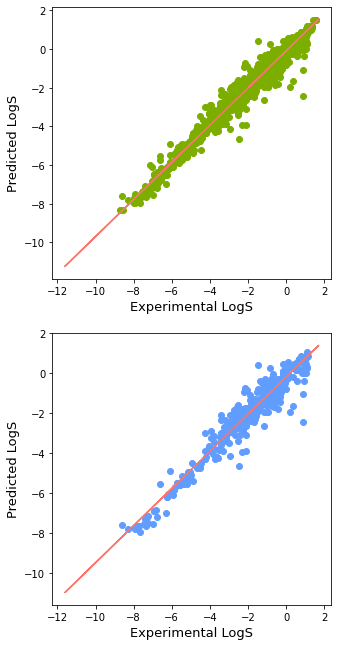

In [44]:
#Vertical plot
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=y_train_filtered, y=y_pred_train, c="#7CAE00", alpha=1)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(y_train_filtered, y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")


plt.xlabel('Experimental LogS',fontsize=13)
plt.ylabel('Predicted LogS',fontsize=13)


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=y_test_split, y=y_pred, c="#619CFF", alpha=1)

z = np.polyfit(y_test_split, y_pred, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS',fontsize=13)
plt.xlabel('Experimental LogS',fontsize=13)

#plt.savefig('plot_vertical_logS.png')
plt.savefig('RF-DS after.pdf',dpi=1200)
plt.show()

In [44]:

#reg = LinearRegression()
#reg.fit(X, y)
i=0

for i in range(len(X.columns)):
# Print out the coefficients for each fingerprint

    print(X.columns[i], ":", reg.coef_[i])

ABC : -0.15744879535277845
nAcid : -0.39429834333662583
nBase : 0.14953852633987533
nAromAtom : 0.21147526791678214
nAtom : -0.17434578031405404
nBridgehead : 0.10623186852941115
nHetero : -1.9662648429913678
nC : -1.0276275997304334
nN : 0.8661099267939315
nO : 1.166310069733236
nS : -2.5402871470842157
nF : 37.239437072868284
nCl : 35.20562949822046
nBr : 21.81134252839476
nX : -37.9659968151415
ATS0Z : 0.013745352860719349
AATS0dv : -0.0007319041351990952
AATS0d : 0.0544675534242642
AATS0i : -0.004873195739193613
ATSC1dv : 0.024046518138185764
ATSC2dv : -0.006940180958330683
ATSC3dv : -0.0036628521248247975
ATSC4dv : -0.002567367598853014
ATSC5dv : -6.467311343795554e-05
ATSC6dv : -0.005039318822292188
ATSC7dv : 0.0005007591475885455
ATSC8dv : 0.00011285473788008593
ATSC1d : -0.05127518146959412
ATSC2d : 0.05575447291069454
ATSC3d : 0.005660637438971723
ATSC4d : 0.00634150854307999
ATSC5d : 0.012066277895800191
ATSC6d : 0.0027038594586309556
ATSC7d : -0.005886434879122951
ATSC8d : 0

In [45]:
i = 0
coefficients = []

# Iterate over the columns of X
for i in range(len(X.columns)):
    # Store the column name and its coefficient in a tuple
    coefficient_tuple = (X.columns[i], reg.coef_[i])
    coefficients.append(coefficient_tuple)

# Sort the coefficients list based on the second element (coefficient) of each tuple in descending order
coefficients_sorted = sorted(coefficients, key=lambda x: x[1], reverse=True)

# Print the sorted coefficients
for coefficient in coefficients_sorted:
    print(coefficient[0], ":", coefficient[1])


nF : 37.239437072868284
nCl : 35.20562949822046
nBr : 21.81134252839476
nO : 1.166310069733236
ATSC1se : 0.9704093837235614
nN : 0.8661099267939315
NssssC : 0.6291685587661617
GATS1p : 0.5833456338822307
NsssCH : 0.5549627577955583
NssCH2 : 0.5179514636071991
Xc-5d : 0.5106062658661821
NsNH2 : 0.49240357028713544
NaasN : 0.45213330560413123
NssNH : 0.3728726748906349
NsCH3 : 0.35559961505869764
n6HRing : 0.32441185685374346
NsOH : 0.3050075689945201
BalabanJ : 0.29303929395491857
n5HRing : 0.29130745041296463
nAromAtom : 0.21147526791678214
NdsCH : 0.20417936612271947
NdssC : 0.18460905685583207
naHRing : 0.18085428566020642
IC1 : 0.17214238385787756
ATSC6se : 0.16019825311664646
nBase : 0.14953852633987533
SdsN : 0.10682897909585903
nBridgehead : 0.10623186852941115
NaaN : 0.09085987444682778
VSA_EState9 : 0.08773101200179612
ATSC3se : 0.08764993440804929
VSA_EState1 : 0.0873370434121945
SdCH2 : 0.08716400747578265
NsssN : 0.08495446891498043
SsSH : 0.07828193771517669
SdsssP : 0.0762

In [46]:
import pandas as pd

i = 0
coefficients = []

# Iterate over the columns of X
for i in range(len(X.columns)):
    # Store the column name and its coefficient in a tuple
    coefficient_tuple = (X.columns[i], reg.coef_[i])
    coefficients.append(coefficient_tuple)

# Sort the coefficients list based on the second element (coefficient) of each tuple in descending order
coefficients_sorted = sorted(coefficients, key=lambda x: x[1], reverse=True)

# Extract the column names and coefficients from the sorted list
column_names = [coefficient[0] for coefficient in coefficients_sorted]
coefficients_values = [coefficient[1] for coefficient in coefficients_sorted]

# Create a data frame with column names and coefficients
data = {'Column': column_names, 'Coefficient': coefficients_values}
df = pd.DataFrame(data)

# Save the data frame to an Excel file
df.to_excel('coefficients_data.xlsx', index=False)

# Print the sorted coefficients
for coefficient in coefficients_sorted:
    print(coefficient[0], ":", coefficient[1])


nF : 37.239437072868284
nCl : 35.20562949822046
nBr : 21.81134252839476
nO : 1.166310069733236
ATSC1se : 0.9704093837235614
nN : 0.8661099267939315
NssssC : 0.6291685587661617
GATS1p : 0.5833456338822307
NsssCH : 0.5549627577955583
NssCH2 : 0.5179514636071991
Xc-5d : 0.5106062658661821
NsNH2 : 0.49240357028713544
NaasN : 0.45213330560413123
NssNH : 0.3728726748906349
NsCH3 : 0.35559961505869764
n6HRing : 0.32441185685374346
NsOH : 0.3050075689945201
BalabanJ : 0.29303929395491857
n5HRing : 0.29130745041296463
nAromAtom : 0.21147526791678214
NdsCH : 0.20417936612271947
NdssC : 0.18460905685583207
naHRing : 0.18085428566020642
IC1 : 0.17214238385787756
ATSC6se : 0.16019825311664646
nBase : 0.14953852633987533
SdsN : 0.10682897909585903
nBridgehead : 0.10623186852941115
NaaN : 0.09085987444682778
VSA_EState9 : 0.08773101200179612
ATSC3se : 0.08764993440804929
VSA_EState1 : 0.0873370434121945
SdCH2 : 0.08716400747578265
NsssN : 0.08495446891498043
SsSH : 0.07828193771517669
SdsssP : 0.0762

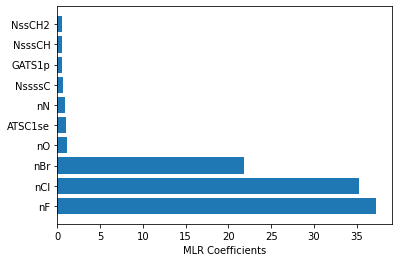

In [47]:
import matplotlib.pyplot as plt

i = 0
coefficients = []

# Iterate over the columns of X
for i in range(len(X.columns)):
    # Store the column name and its coefficient in a tuple
    coefficient_tuple = (X.columns[i], reg.coef_[i])
    coefficients.append(coefficient_tuple)

# Sort the coefficients list based on the second element (coefficient) of each tuple in descending order
coefficients_sorted = sorted(coefficients, key=lambda x: x[1], reverse=True)

# Select only the top ten coefficients
top_ten_coefficients = coefficients_sorted[:10]

# Extract the column names and coefficients from the top ten coefficients
column_names = [coefficient[0] for coefficient in top_ten_coefficients]
coefficients_values = [coefficient[1] for coefficient in top_ten_coefficients]

# Create a bar chart
plt.barh(range(len(column_names)), coefficients_values, align='center')
plt.yticks(range(len(column_names)), column_names)
plt.xlabel('MLR Coefficients')
#plt.ylabel('Column')
#plt.title('Top Ten Coefficients Comparison')

plt.savefig('coefficients_chart.png', dpi=1200)

# Display the bar chart
plt.show()


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have your filtered X_train data as X_train_filtered

# Split the filtered data into training and testing sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_filtered, y_train_filtered, test_size=0.2, random_state=42)

# Create a linear regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train_split, y_train_split)

# Predict the target variable for the test data
y_pred = model.predict(X_test_split)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_split, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test_split, y_pred)

# Calculate R^2 score
r2 = r2_score(y_test_split, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r2)


RMSE: 0.5374704538208803
MAE: 0.35664441475323644
R^2: 0.9314632927692059


In [34]:
# Predict the target variable for the training data
y_pred_train = model.predict(X_train_filtered)

# Calculate RMSE for training data
rmse_train = np.sqrt(mean_squared_error(y_train_filtered, y_pred_train))

# Calculate MAE for training data
mae_train = mean_absolute_error(y_train_filtered, y_pred_train)

# Calculate R^2 score for training data
r2_train = r2_score(y_train_filtered, y_pred_train)

print("RMSE (Train):", rmse_train)
print("MAE (Train):", mae_train)
print("R^2 (Train):", r2_train)

RMSE (Train): 0.30913488449431326
MAE (Train): 0.1867932181655718
R^2 (Train): 0.9791494841243245


In [65]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [66]:
#predicts the X_train
Y_pred_train = model.predict(X_train)
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (RMSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))



Mean squared error (RMSE): 0.25
Coefficient of determination (R^2): 0.98


In [67]:
mae_test2 = mean_absolute_error(Y_train, Y_pred_train)
rmse_test2 = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
r2_test2 = r2_score(Y_train, Y_pred_train)

# Print the results
print("MAE (filtered test):", mae_test2)
print("RMSE (filtered test):", rmse_test2)
print("R^2 (filtered test):", r2_test2)

MAE (filtered test): 0.165107871835008
RMSE (filtered test): 0.2520332065236204
R^2 (filtered test): 0.9814850640563298


In [68]:
Y_pred_test = model.predict(X_test)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (MSE): 0.64
Coefficient of determination (R^2): 0.88


In [64]:
mae_filtered_test2 = mean_absolute_error(Y_test, Y_pred_test)
rmse_filtered_test2 = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
r2_filtered_test2 = r2_score(Y_test, Y_pred_test)

# Print the results
print("MAE (filtered test):", mae_filtered_test2)
print("RMSE (filtered test):", rmse_filtered_test2)
print("R^2 (filtered test):", r2_filtered_test2)

MAE (filtered test): 0.41696942750871235
RMSE (filtered test): 0.6405894121981005
R^2 (filtered test): 0.8838041086205324


In [65]:
mae = mean_absolute_error(Y_test, Y_pred_test)
mae

0.41696942750871235

In [69]:
import numpy as np

# Convert lists to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

# Print the shapes
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6750, 177) (1688, 177) (6750,) (1688,)


In [70]:
yhat = model.predict(X_test)
# evaluate predictions
#mae = mean_absolute_error(Y_test, yhat)
#print('MAE: %.3f' % mae)

C:\Users\DEDP Grader\anaconda3\envs\rdkit\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [71]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_test)

In [72]:
mask = yhat != -1
X_test, Y_test = X_test[mask, :], Y_test[mask]


In [73]:
print(X_test.shape, Y_test.shape)

(1536, 177) (1536,)


In [77]:
# fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
# evaluate the model
Y_test_pred2 = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(Y_test, Y_test_pred2)
print('MAE: %.3f' % mae)

MAE: 0.406


In [75]:
# fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_test, Y_test)
# evaluate the model
Y_test_pred2 = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(Y_test, Y_test_pred2)
print('MAE: %.3f' % mae)

KeyboardInterrupt: 

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse_filtered = np.sqrt(mean_squared_error(Y_test, Y_test_pred2))

# Calculate R^2
r2_filtered = r2_score(Y_test, Y_test_pred2)

print("RMSE (filtered):", rmse_filtered)
print("R^2 (filtered):", r2_filtered)

RMSE (filtered): 0.6244464152714275
R^2 (filtered): 0.8859758925205345


In [74]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [75]:
mask = yhat != -1
X_train, Y_train = X_train[mask, :], Y_train[mask]


In [76]:
print(X_train.shape, Y_train.shape)

(6515, 177) (6515,)


In [79]:
# fit the model
#model = RandomForestRegressor(n_estimators=100, random_state=42)
#model.fit(X_train, Y_train)
# evaluate the model
Y_train_pred2 = model.predict(X_train)
# evaluate predictions
mae = mean_absolute_error(Y_train, Y_train_pred2)
print('MAE: %.3f' % mae)

MAE: 0.163


In [80]:
#Y_train_pred2 = model.predict(X_train)
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse_filtered = np.sqrt(mean_squared_error(Y_train, Y_train_pred2))

# Calculate R^2
r2_filtered = r2_score(Y_train, Y_train_pred2)
mae = mean_absolute_error(Y_train, Y_train_pred2)

print('MAE: %.3f' % mae)

print("RMSE (filtered):", rmse_filtered)
print("R^2 (filtered):", r2_filtered)

MAE: 0.163
RMSE (filtered): 0.2510194655094168
R^2 (filtered): 0.9813240211165425


In [81]:
#Y_test_pred2 = model.predict(X_test)
rmse_filtered = np.sqrt(mean_squared_error(Y_test, Y_test_pred2))

# Calculate R^2
r2_filtered = r2_score(Y_test, Y_test_pred2)

print("RMSE (filtered):", rmse_filtered)
print("R^2 (filtered):", r2_filtered)

RMSE (filtered): 0.6244464152714275
R^2 (filtered): 0.8859758925205345


In [125]:
Y_test_pred2 = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(Y_test, Y_test_pred2)
print('MAE: %.3f' % mae)

MAE: 0.406


In [53]:
outlier_indices = np.where(mask == False)[0]

print(outlier_indices)

[   9   16   41   61   85  122  223  250  253  254  315  330  437  454
  457  473  548  554  555  576  614  653  667  701  784  823  875  891
  911  925  964  980 1007 1026 1111 1137 1171 1219 1225 1226 1241 1266
 1301 1305 1343 1363 1460 1463 1522 1533 1537 1564 1574 1590 1673 1679
 1711 1725 1755 1784 1791 1801 1820 1853 1856 1863 1867 1927 1931 1935
 1940 2004 2010 2133 2155 2164 2178 2201 2295 2297 2356 2361 2476 2507
 2511 2519 2542 2582 2601 2623 2637 2695 2703 2739 2757 2766 2804 2833
 2868 2929 2952 2988 2998 3003 3017 3041 3044 3062 3066 3158 3220 3222
 3235 3238 3293 3308 3344 3354 3383 3450 3553 3560 3573 3673 3683 3710
 3776 3817 3835 3861 3885 3889 3898 3928 3936 3982 4036 4165 4169 4189
 4227 4229 4236 4244 4270 4299 4323 4326 4353 4386 4398 4411 4447 4466
 4470 4478 4550 4575 4613 4625 4703 4756 4769 4843 4850 4856 4918 4937
 4950 4958 4960 4979 4986 5020 5163 5172 5218 5223 5226 5244 5252 5299
 5370 5416 5451 5474 5480 5516 5556 5575 5590 5615 5625 5629 5638 5641
 5716 

In [54]:
outlier_features = sol.iloc[outlier_indices]
outlier_features

,SMILES,measured log(solubility:mol/L)
9,OCC1OC(OCC(O)C(O)C(O)C(O)C=O)C(O)C(O)C1O,0.47
16,CCOP(=O)(OCC)OP(=O)(OCC)OP(=O)(OCC)OP(=O)(OCC)OCC,0.30
41,OC(=O)CC1(O)CC(=O)N(C1=O)C1=CC=CC=C1,-0.68
61,CN(C)C(=O)CCOC(=O)C1=CC=CC=C1,-1.10
85,CN1N(C(=O)C(NC(N)=O)=C1C)C1=CC=CC=C1,-1.52
...,...,...
6611,N[C@H](CO)C(O)=O,0.54
6687,OC(=O)C(Cl)=C(Br)Br,-0.69
6698,OC(=O)C(F)(F)C(F)F,-0.88
6699,BrCC#C,-0.90


In [55]:
outlier_features.to_csv('sorted_residuals.csv', index=False)

In [57]:
testdata_outlier = pd.read_csv('D:/python/rdkit/outlier_Ds.csv')
testdata_outlier

,SMILES,measured log(solubility:mol/L)
0,OCC1OC(OCC(O)C(O)C(O)C(O)C=O)C(O)C(O)C1O,0.47
1,CCOP(=O)(OCC)OP(=O)(OCC)OP(=O)(OCC)OP(=O)(OCC)OCC,0.30
2,OC(=O)CC1(O)CC(=O)N(C1=O)C1=CC=CC=C1,-0.68
3,CN(C)C(=O)CCOC(=O)C1=CC=CC=C1,-1.10
4,CN1N(C(=O)C(NC(N)=O)=C1C)C1=CC=CC=C1,-1.52
...,...,...
230,N[C@H](CO)C(O)=O,0.54
231,OC(=O)C(Cl)=C(Br)Br,-0.69
232,OC(=O)C(F)(F)C(F)F,-0.88
233,BrCC#C,-0.90


In [58]:
mordred_descriptors3 = All_Mordred_descriptors(testdata_outlier['SMILES'])

100%|████████████████████████████████████████████████████████████████████████████████| 235/235 [00:06<00:00, 33.99it/s]


In [62]:
Outlier_d=mordred_descriptors3[['AATS0d',
 'AATS0dv',
 'AATS0i',
 'AATSC0dv',
 'AATSC0i',
 'AATSC0v',
 'AATSC1Z',
 'ABC',
 'ATS0Z',
 'ATSC0i',
 'ATSC1Z',
 'ATSC1d',
 'ATSC1dv',
 'ATSC1i',
 'ATSC1p',
 'ATSC1se',
 'ATSC1v',
 'ATSC2Z',
 'ATSC2d',
 'ATSC2dv',
 'ATSC2i',
 'ATSC2se',
 'ATSC2v',
 'ATSC3Z',
 'ATSC3d',
 'ATSC3dv',
 'ATSC3i',
 'ATSC3p',
 'ATSC3se',
 'ATSC3v',
 'ATSC4Z',
 'ATSC4d',
 'ATSC4dv',
 'ATSC4i',
 'ATSC4p',
 'ATSC4se',
 'ATSC4v',
 'ATSC5Z',
 'ATSC5d',
 'ATSC5dv',
 'ATSC5i',
 'ATSC5p',
 'ATSC5se',
 'ATSC5v',
 'ATSC6Z',
 'ATSC6d',
 'ATSC6dv',
 'ATSC6i',
 'ATSC6se',
 'ATSC6v',
 'ATSC7Z',
 'ATSC7d',
 'ATSC7dv',
 'ATSC7i',
 'ATSC7p',
 'ATSC7v',
 'ATSC8Z',
 'ATSC8d',
 'ATSC8dv',
 'ATSC8i',
 'ATSC8v',
 'BalabanJ',
 'C1SP2',
 'C1SP3',
 'C2SP3',
 'C3SP2',
 'C3SP3',
 'CIC1',
 'Diameter',
 'ECIndex',
 'EState_VSA1',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',
 'EState_VSA7',
 'EState_VSA8',
 'GATS1i',
 'GATS1p',
 'IC1',
 'NaaN',
 'NaaNH',
 'NaaaC',
 'NaasC',
 'NaasN',
 'NddsN',
 'NddssS',
 'NdsCH',
 'NdssC',
 'NsCH3',
 'NsNH2',
 'NsOH',
 'NssCH2',
 'NssNH',
 'NssO',
 'NsssCH',
 'NsssN',
 'NssssC',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA4',
 'SMR_VSA6',
 'SMR_VSA9',
 'SaaO',
 'SaasC',
 'SdCH2',
 'SdNH',
 'SdS',
 'SdsN',
 'SdssC',
 'SdsssP',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA7',
 'SsI',
 'SsSH',
 'SssS',
 'SsssCH',
 'StCH',
 'StN',
 'StsC',
 'VSA_EState1',
 'VSA_EState2',
 'VSA_EState4',
 'VSA_EState7',
 'VSA_EState8',
 'VSA_EState9',
 'WPath',
 'Xc-3dv',
 'Xc-5d',
 'Xc-5dv',
 'Xch-7d',
 'n5ARing',
 'n5HRing',
 'n5Ring',
 'n5aRing',
 'n6ARing',
 'n6HRing',
 'nAHRing',
 'nARing',
 'nAcid',
 'nAromAtom',
 'nAtom',
 'nBase',
 'nBondsD',
 'nBr',
 'nBridgehead',
 'nC',
 'nCl',
 'nF',
 'nFRing',
 'nHBAcc',
 'nHBDon',
 'nHRing',
 'nHetero',
 'nN',
 'nO',
 'nRot',
 'nS',
 'nX',
 'naHRing'

]]
Outlier_d.shape


(235, 177)

In [63]:
Outlier_d.to_excel(r'D:/python/rdkit/file name descriptor 32data.xlsx', index = False)

In [64]:
testdata_outlier2 = pd.read_csv('D:/python/rdkit/dataset_without_outliers_Dc.csv')
testdata_outlier2

,SMILES,measured log(solubility:mol/L)
0,OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O,0.79
1,O[C@H]1[C@H](O[C@H](CO)[C@@H](O)[C@@H]1O)O[C@]...,0.79
2,OC[C@@H]1O[C@](CO)(O[C@@H]2O[C@@H](CO)[C@H](O)...,0.79
3,CN1C[C@@H]2C[C@@H](C1)C3=CC=CC(=O)N3C2,0.65
4,CN1CC2CC(C1)C1=CC=CC(=O)N1C2,0.65
...,...,...
8168,O=[N+]([O-])C,0.26
8169,OC,1.57
8170,S=C(N)N,0.32
8171,O=C(NO)N,1.12


In [65]:
mordred_descriptors4 = All_Mordred_descriptors(testdata_outlier2['SMILES'])

100%|██████████████████████████████████████████████████████████████████████████████| 8173/8173 [04:46<00:00, 28.52it/s]


In [66]:
Outlier_d2=mordred_descriptors4[['AATS0d',
 'AATS0dv',
 'AATS0i',
 'AATSC0dv',
 'AATSC0i',
 'AATSC0v',
 'AATSC1Z',
 'ABC',
 'ATS0Z',
 'ATSC0i',
 'ATSC1Z',
 'ATSC1d',
 'ATSC1dv',
 'ATSC1i',
 'ATSC1p',
 'ATSC1se',
 'ATSC1v',
 'ATSC2Z',
 'ATSC2d',
 'ATSC2dv',
 'ATSC2i',
 'ATSC2se',
 'ATSC2v',
 'ATSC3Z',
 'ATSC3d',
 'ATSC3dv',
 'ATSC3i',
 'ATSC3p',
 'ATSC3se',
 'ATSC3v',
 'ATSC4Z',
 'ATSC4d',
 'ATSC4dv',
 'ATSC4i',
 'ATSC4p',
 'ATSC4se',
 'ATSC4v',
 'ATSC5Z',
 'ATSC5d',
 'ATSC5dv',
 'ATSC5i',
 'ATSC5p',
 'ATSC5se',
 'ATSC5v',
 'ATSC6Z',
 'ATSC6d',
 'ATSC6dv',
 'ATSC6i',
 'ATSC6se',
 'ATSC6v',
 'ATSC7Z',
 'ATSC7d',
 'ATSC7dv',
 'ATSC7i',
 'ATSC7p',
 'ATSC7v',
 'ATSC8Z',
 'ATSC8d',
 'ATSC8dv',
 'ATSC8i',
 'ATSC8v',
 'BalabanJ',
 'C1SP2',
 'C1SP3',
 'C2SP3',
 'C3SP2',
 'C3SP3',
 'CIC1',
 'Diameter',
 'ECIndex',
 'EState_VSA1',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',
 'EState_VSA7',
 'EState_VSA8',
 'GATS1i',
 'GATS1p',
 'IC1',
 'NaaN',
 'NaaNH',
 'NaaaC',
 'NaasC',
 'NaasN',
 'NddsN',
 'NddssS',
 'NdsCH',
 'NdssC',
 'NsCH3',
 'NsNH2',
 'NsOH',
 'NssCH2',
 'NssNH',
 'NssO',
 'NsssCH',
 'NsssN',
 'NssssC',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA4',
 'SMR_VSA6',
 'SMR_VSA9',
 'SaaO',
 'SaasC',
 'SdCH2',
 'SdNH',
 'SdS',
 'SdsN',
 'SdssC',
 'SdsssP',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA7',
 'SsI',
 'SsSH',
 'SssS',
 'SsssCH',
 'StCH',
 'StN',
 'StsC',
 'VSA_EState1',
 'VSA_EState2',
 'VSA_EState4',
 'VSA_EState7',
 'VSA_EState8',
 'VSA_EState9',
 'WPath',
 'Xc-3dv',
 'Xc-5d',
 'Xc-5dv',
 'Xch-7d',
 'n5ARing',
 'n5HRing',
 'n5Ring',
 'n5aRing',
 'n6ARing',
 'n6HRing',
 'nAHRing',
 'nARing',
 'nAcid',
 'nAromAtom',
 'nAtom',
 'nBase',
 'nBondsD',
 'nBr',
 'nBridgehead',
 'nC',
 'nCl',
 'nF',
 'nFRing',
 'nHBAcc',
 'nHBDon',
 'nHRing',
 'nHetero',
 'nN',
 'nO',
 'nRot',
 'nS',
 'nX',
 'naHRing'

]]
Outlier_d2.shape


(8173, 177)

In [68]:
Outlier_d2.to_excel(r'D:/python/rdkit/177 descriptors for dataset without outliers.xlsx', index = False)

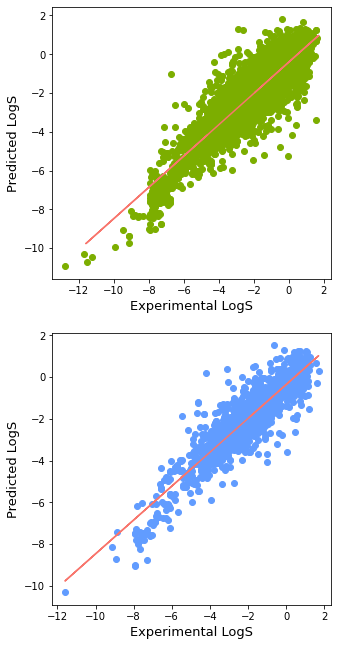

In [43]:
#Vertical plot
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=Y_train, y=Y_train_pred2, c="#7CAE00", alpha=1)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_train_pred2, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")


plt.xlabel('Experimental LogS',fontsize=13)
plt.ylabel('Predicted LogS',fontsize=13)


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_test_pred2, c="#619CFF", alpha=1)

z = np.polyfit(Y_test, Y_test_pred2, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS',fontsize=13)
plt.xlabel('Experimental LogS',fontsize=13)

#plt.savefig('plot_vertical_logS.png')
plt.savefig('paper logS morgan.pdf',dpi=1200)
plt.show()

In [49]:
mae = mean_absolute_error(Y_train, Y_pred_train)
mae

0.165107871835008

In [51]:
residuals= Y_train - Y_pred_train

In [52]:
mse=np.mean(residuals**2)
RMSE = np.sqrt(mse)
RMSE

0.2520332065236204

In [53]:
n=len(Y_train)
p=X.shape[1]
SEE=np.sqrt(mse*(n-p-1)/n)
SEE

0.24868790043880984

In [54]:
SEP = SEE * np.sqrt(1 + 1/n)
SEP

0.2487063210825475

In [55]:
# Calculate the residuals
residuals_test = Y_test - Y_pred_test

# Calculate the mean of the residuals for the test set
mean_residuals_test = np.mean(residuals_test)

# Calculate the standard deviation of the residuals for the test set
std_residuals_test = np.std(residuals_test, ddof=1)

# Calculate the standard error of prediction (SEP) for the test set
SEP = std_residuals_test * np.sqrt(1 + 1/len(X_test))

SEE=SEP*(1/(np.sqrt(1 + 1/(len(X_test)))))
SEE
# Calculate the standard error of estimate (SEE) for the training set
print("Standard error of prediction on test set: {:.2f}".format(SEP))
print("Standard error of estimate on training set: {:.2f}".format(SEE))

Standard error of prediction on test set: 0.64
Standard error of estimate on training set: 0.64


In [87]:
import shap
from sklearn.preprocessing import StandardScaler
import os
import sys
#import Explanation

C:\Users\DEDP Grader\anaconda3\envs\rdkit\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [104]:

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

In [93]:
X = X_test
Xscaler = StandardScaler()
X2= Xscaler.fit_transform(X)
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X2)

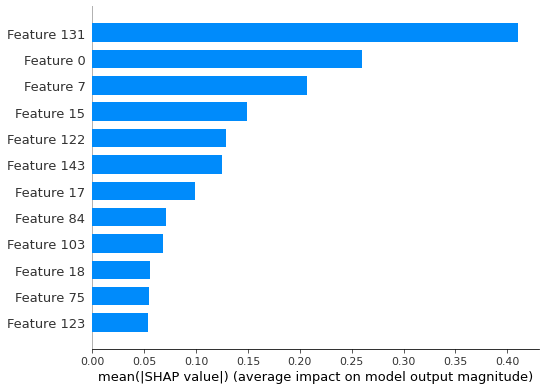

In [105]:
shap.summary_plot(shap_values, max_display=12, plot_type="bar",show=False)
plt.savefig('scratcch.pdf',bbox_inches='tight',dpi = 1000)

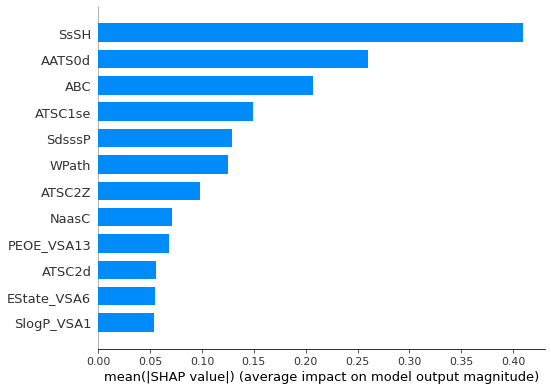

In [112]:
import matplotlib.pyplot as plt

# Assuming you have a list of feature names named 'feature_names'
feature_names = ['AATS0d',
 'AATS0dv',
 'AATS0i',
 'AATSC0dv',
 'AATSC0i',
 'AATSC0v',
 'AATSC1Z',
 'ABC',
 'ATS0Z',
 'ATSC0i',
 'ATSC1Z',
 'ATSC1d',
 'ATSC1dv',
 'ATSC1i',
 'ATSC1p',
 'ATSC1se',
 'ATSC1v',
 'ATSC2Z',
 'ATSC2d',
 'ATSC2dv',
 'ATSC2i',
 'ATSC2se',
 'ATSC2v',
 'ATSC3Z',
 'ATSC3d',
 'ATSC3dv',
 'ATSC3i',
 'ATSC3p',
 'ATSC3se',
 'ATSC3v',
 'ATSC4Z',
 'ATSC4d',
 'ATSC4dv',
 'ATSC4i',
 'ATSC4p',
 'ATSC4se',
 'ATSC4v',
 'ATSC5Z',
 'ATSC5d',
 'ATSC5dv',
 'ATSC5i',
 'ATSC5p',
 'ATSC5se',
 'ATSC5v',
 'ATSC6Z',
 'ATSC6d',
 'ATSC6dv',
 'ATSC6i',
 'ATSC6se',
 'ATSC6v',
 'ATSC7Z',
 'ATSC7d',
 'ATSC7dv',
 'ATSC7i',
 'ATSC7p',
 'ATSC7v',
 'ATSC8Z',
 'ATSC8d',
 'ATSC8dv',
 'ATSC8i',
 'ATSC8v',
 'BalabanJ',
 'C1SP2',
 'C1SP3',
 'C2SP3',
 'C3SP2',
 'C3SP3',
 'CIC1',
 'Diameter',
 'ECIndex',
 'EState_VSA1',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',
 'EState_VSA7',
 'EState_VSA8',
 'GATS1i',
 'GATS1p',
 'IC1',
 'NaaN',
 'NaaNH',
 'NaaaC',
 'NaasC',
 'NaasN',
 'NddsN',
 'NddssS',
 'NdsCH',
 'NdssC',
 'NsCH3',
 'NsNH2',
 'NsOH',
 'NssCH2',
 'NssNH',
 'NssO',
 'NsssCH',
 'NsssN',
 'NssssC',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA4',
 'SMR_VSA6',
 'SMR_VSA9',
 'SaaO',
 'SaasC',
 'SdCH2',
 'SdNH',
 'SdS',
 'SdsN',
 'SdssC',
 'SdsssP',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA7',
 'SsI',
 'SsSH',
 'SssS',
 'SsssCH',
 'StCH',
 'StN',
 'StsC',
 'VSA_EState1',
 'VSA_EState2',
 'VSA_EState4',
 'VSA_EState7',
 'VSA_EState8',
 'VSA_EState9',
 'WPath',
 'Xc-3dv',
 'Xc-5d',
 'Xc-5dv',
 'Xch-7d',
 'n5ARing',
 'n5HRing',
 'n5Ring',
 'n5aRing',
 'n6ARing',
 'n6HRing',
 'nAHRing',
 'nARing',
 'nAcid',
 'nAromAtom',
 'nAtom',
 'nBase',
 'nBondsD',
 'nBr',
 'nBridgehead',
 'nC',
 'nCl',
 'nF',
 'nFRing',
 'nHBAcc',
 'nHBDon',
 'nHRing',
 'nHetero',
 'nN',
 'nO',
 'nRot',
 'nS',
 'nX',
 'naHRing']  # Update with your actual feature names

# Plot the SHAP summary plot with feature names
shap.summary_plot(shap_values, max_display=12, plot_type="bar", feature_names=feature_names, show=False)

# Save the plot to a PDF file with tight bounding box and high DPI
plt.savefig('scratcch.pdf', bbox_inches='tight', dpi=1000)


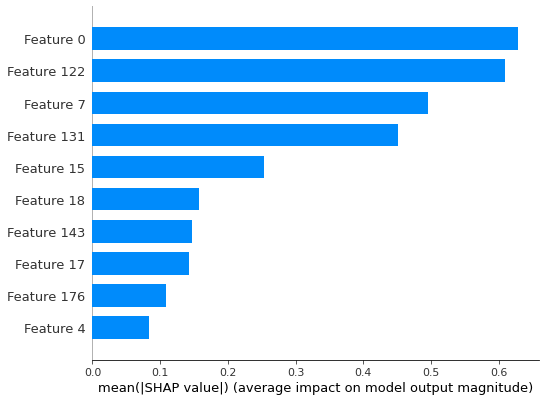

In [97]:
shap.summary_plot(shap_values, X_test, plot_type="bar",show=False,max_display=10,plot_size=0.5)

#plot_size=(18.0, 10.0)
plt.savefig('most effective descriptor for des approch with SLOGP.pdf',bbox_inches='tight',dpi = 1000)

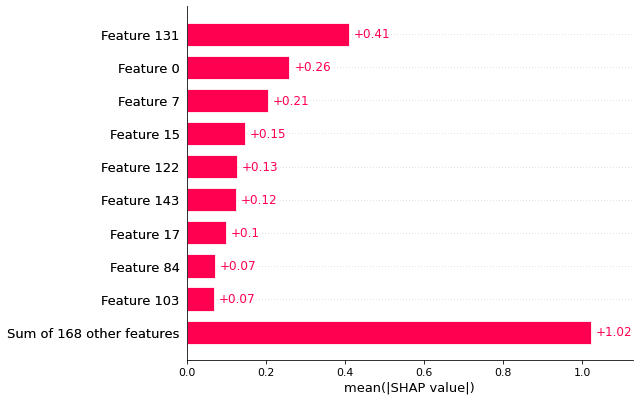

In [111]:


shap.plots.bar(shap_values, max_display=10, show=False)
plt.savefig('scratcch.pdf',bbox_inches='tight',dpi = 1000)

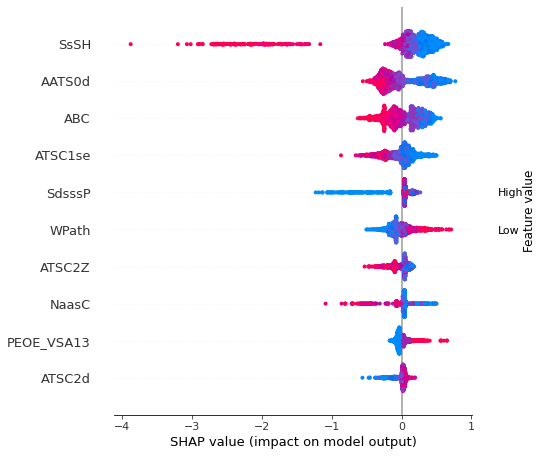

In [109]:
shap.summary_plot(shap_values, plot_type="dot", plot_size=0.6, show=False,max_display=10, feature_names=feature_names)
plt.savefig('scratcch.pdf',bbox_inches='tight',dpi = 1000)

ValueError: x and y must be the same size

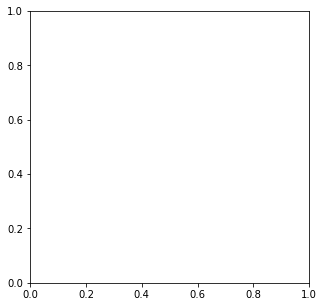

In [48]:
#Vertical plot
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=1)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")


plt.xlabel('Experimental LogS', fontsize=13)
plt.ylabel('Predicted LogS', fontsize=13)


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=1)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS', fontsize=13)
plt.xlabel('Experimental LogS', fontsize=13)

plt.savefig('plot_vertical_logS.png')
plt.savefig('paper logS descriptor.pdf',dpi=1200)
plt.show()

In [82]:
#Blind test
testdata = pd.read_csv('D:/python/rdkit/testexperiment2upload3raw.csv')
testdata

,Substance,SMILES
0,hexobarbital,CN1C(=O)NC(=O)C(C)(C1=O)C1=CCCCC1
1,nalidixic_acid,CCn1cc(c(=O)c2ccc(nc12)C)C(=O)O
2,phenantroline,c12c(ccc3cccnc13)cccn2
3,phenobarbital,C1(NC(C(c2ccccc2)(C(=O)N1)CC)=O)=O
4,sulfamethazine,S(=O)(=O)(Nc1nc(C)cc(n1)C)c1ccc(N)cc1
5,bromogramine,Brc1cc2c(CN(C)C)c[nH]c2cc1
6,phenazopyridine,c1ccc(cc1)\N=N\c1c(nc(cc1)N)N
7,amantadine,C1C2CC3CC(CC1C3)(N)C2
8,benzylimidazole,n1(Cc2ccccc2)cncc1
9,chlorpropamide,Clc1ccc(S(=O)(NC(=O)NCCC)=O)cc1


In [83]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=True)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df

In [84]:
mordred_descriptors2 = All_Mordred_descriptors(testdata['SMILES'])

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:06<00:00,  4.64it/s]


In [85]:
Xnew=mordred_descriptors2[['AATS0d',
 'AATS0dv',
 'AATS0i',
 'AATSC0dv',
 'AATSC0i',
 'AATSC0v',
 'AATSC1Z',
 'ABC',
 'ATS0Z',
 'ATSC0i',
 'ATSC1Z',
 'ATSC1d',
 'ATSC1dv',
 'ATSC1i',
 'ATSC1p',
 'ATSC1se',
 'ATSC1v',
 'ATSC2Z',
 'ATSC2d',
 'ATSC2dv',
 'ATSC2i',
 'ATSC2se',
 'ATSC2v',
 'ATSC3Z',
 'ATSC3d',
 'ATSC3dv',
 'ATSC3i',
 'ATSC3p',
 'ATSC3se',
 'ATSC3v',
 'ATSC4Z',
 'ATSC4d',
 'ATSC4dv',
 'ATSC4i',
 'ATSC4p',
 'ATSC4se',
 'ATSC4v',
 'ATSC5Z',
 'ATSC5d',
 'ATSC5dv',
 'ATSC5i',
 'ATSC5p',
 'ATSC5se',
 'ATSC5v',
 'ATSC6Z',
 'ATSC6d',
 'ATSC6dv',
 'ATSC6i',
 'ATSC6se',
 'ATSC6v',
 'ATSC7Z',
 'ATSC7d',
 'ATSC7dv',
 'ATSC7i',
 'ATSC7p',
 'ATSC7v',
 'ATSC8Z',
 'ATSC8d',
 'ATSC8dv',
 'ATSC8i',
 'ATSC8v',
 'BalabanJ',
 'C1SP2',
 'C1SP3',
 'C2SP3',
 'C3SP2',
 'C3SP3',
 'CIC1',
 'Diameter',
 'ECIndex',
 'EState_VSA1',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',
 'EState_VSA7',
 'EState_VSA8',
 'GATS1i',
 'GATS1p',
 'IC1',
 'NaaN',
 'NaaNH',
 'NaaaC',
 'NaasC',
 'NaasN',
 'NddsN',
 'NddssS',
 'NdsCH',
 'NdssC',
 'NsCH3',
 'NsNH2',
 'NsOH',
 'NssCH2',
 'NssNH',
 'NssO',
 'NsssCH',
 'NsssN',
 'NssssC',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA4',
 'SMR_VSA6',
 'SMR_VSA9',
 'SaaO',
 'SaasC',
 'SdCH2',
 'SdNH',
 'SdS',
 'SdsN',
 'SdssC',
 'SdsssP',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA7',
 'SsI',
 'SsSH',
 'SssS',
 'SsssCH',
 'StCH',
 'StN',
 'StsC',
 'VSA_EState1',
 'VSA_EState2',
 'VSA_EState4',
 'VSA_EState7',
 'VSA_EState8',
 'VSA_EState9',
 'WPath',
 'Xc-3dv',
 'Xc-5d',
 'Xc-5dv',
 'Xch-7d',
 'n5ARing',
 'n5HRing',
 'n5Ring',
 'n5aRing',
 'n6ARing',
 'n6HRing',
 'nAHRing',
 'nARing',
 'nAcid',
 'nAromAtom',
 'nAtom',
 'nBase',
 'nBondsD',
 'nBr',
 'nBridgehead',
 'nC',
 'nCl',
 'nF',
 'nFRing',
 'nHBAcc',
 'nHBDon',
 'nHRing',
 'nHetero',
 'nN',
 'nO',
 'nRot',
 'nS',
 'nX',
 'naHRing']]
Xnew.shape


(32, 177)

In [66]:
Xnew.to_excel(r'D:/python/rdkit/file name descriptor 32data.xlsx', index = False)

In [86]:
model.fit(X_train, Y_train)
# Predict the target variable for the test data
ynew = model.predict(Xnew)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
ynew

C:\Users\DEDP Grader\anaconda3\envs\rdkit\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([-1.775035  , -1.74710833, -2.13763074, -2.14613333, -1.97639521,
       -1.845475  , -2.19966111, -1.91222933, -1.58789583, -1.86857292,
       -1.81561667, -2.39336111, -1.80413333, -2.167335  , -1.52069667,
       -1.92757279, -2.16275729, -1.77906667, -1.83060798, -2.08420833,
       -1.83011667, -1.82729896, -1.81257205, -1.76492333, -2.43303076,
       -2.09171658, -1.29601   , -1.79385833, -1.97186667, -1.924025  ,
       -1.87687708, -1.97978333])

In [131]:
from numpy import asarray
from numpy import savetxt
# define data
data = asarray(ynew)
# save to csv file
savetxt('dataggg.csv', data, delimiter=',')

In [49]:

ynew = model.predict(Xnew)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
ynew

C:\Users\DEDP Grader\anaconda3\envs\rdkit\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([-1.68826583, -1.53878849, -1.92763991, -2.1367225 , -1.5552    ,
       -1.68333481, -2.07580241, -1.88745417, -1.66066417, -1.67397806,
       -1.8592603 , -1.89606991, -1.89626583, -1.76006324, -1.40658646,
       -1.49781417, -1.8756775 , -1.77150833, -1.93405022, -1.96255233,
       -1.86271417, -1.6353497 , -2.11163916, -1.56935876, -2.74222273,
       -2.07408491, -1.31016197, -1.70211   , -1.54830324, -1.92240083,
       -1.6873275 , -1.8876375 ])

In [166]:
#Solubility Challenge
testdata = pd.read_csv('D:/python/rdkit/testexperiment2upload2raw.csv')
testdata

,name,SMILES
0,Acebutolol,CC(C)NCC(O)COC1=C(C(C)=O)C=C(NC(CCC)=O)C=C1
1,Amoxicillin,O=C(O)[C@H]1C(C)(C)S[C@@H](N21)[C@H](NC([C@@H]...
2,Bendroflumethiazide,O=S1(C2=CC(S(N)(=O)=O)=C(C(F)(F)F)C=C2NC(CC3=C...
3,Benzocaine,NC1=CC=C(C(OCC)=O)C=C1
4,Benzthiazide,O=S1(C2=CC(S(N)(=O)=O)=C(Cl)C=C2N=C(CSCC3=CC=C...
5,2-chloromandelic_acid,OC(C(O)C1=CC=CC=C1Cl)=O
6,Clozapine,ClC(C=C1)=CC2=C1NC(C=CC=C3)=C3C(N4CCN(C)CC4)=N2
7,Dibucaine,CCN(CC)CCNC(C1=C(C=CC=C2)C2=NC(OCCCC)=C1)=O
8,Diethylstilbestrol,CC/C(C1=CC=C(O)C=C1)=C(C2=CC=C(O)C=C2)/CC
9,Diflunisal,FC(C=C1F)=CC=C1C2=CC=C(O)C(C(O)=O)=C2


In [167]:
mordred_descriptors3 = All_Mordred_descriptors(testdata['SMILES'])

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:03<00:00,  9.38it/s]


In [168]:
X2new=mordred_descriptors3[['AATS0d',
 'AATS0dv',
 'AATS0i',
 'AATSC0dv',
 'AATSC0i',
 'AATSC0v',
 'AATSC1Z',
 'ABC',
 'ATS0Z',
 'ATSC0i',
 'ATSC1Z',
 'ATSC1d',
 'ATSC1dv',
 'ATSC1i',
 'ATSC1p',
 'ATSC1se',
 'ATSC1v',
 'ATSC2Z',
 'ATSC2d',
 'ATSC2dv',
 'ATSC2i',
 'ATSC2se',
 'ATSC2v',
 'ATSC3Z',
 'ATSC3d',
 'ATSC3dv',
 'ATSC3i',
 'ATSC3p',
 'ATSC3se',
 'ATSC3v',
 'ATSC4Z',
 'ATSC4d',
 'ATSC4dv',
 'ATSC4i',
 'ATSC4p',
 'ATSC4se',
 'ATSC4v',
 'ATSC5Z',
 'ATSC5d',
 'ATSC5dv',
 'ATSC5i',
 'ATSC5p',
 'ATSC5se',
 'ATSC5v',
 'ATSC6Z',
 'ATSC6d',
 'ATSC6dv',
 'ATSC6i',
 'ATSC6se',
 'ATSC6v',
 'ATSC7Z',
 'ATSC7d',
 'ATSC7dv',
 'ATSC7i',
 'ATSC7p',
 'ATSC7v',
 'ATSC8Z',
 'ATSC8d',
 'ATSC8dv',
 'ATSC8i',
 'ATSC8v',
 'BalabanJ',
 'C1SP2',
 'C1SP3',
 'C2SP3',
 'C3SP2',
 'C3SP3',
 'CIC1',
 'Diameter',
 'ECIndex',
 'EState_VSA1',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',
 'EState_VSA7',
 'EState_VSA8',
 'GATS1i',
 'GATS1p',
 'IC1',
 'NaaN',
 'NaaNH',
 'NaaaC',
 'NaasC',
 'NaasN',
 'NddsN',
 'NddssS',
 'NdsCH',
 'NdssC',
 'NsCH3',
 'NsNH2',
 'NsOH',
 'NssCH2',
 'NssNH',
 'NssO',
 'NsssCH',
 'NsssN',
 'NssssC',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA4',
 'SMR_VSA6',
 'SMR_VSA9',
 'SaaO',
 'SaasC',
 'SdCH2',
 'SdNH',
 'SdS',
 'SdsN',
 'SdssC',
 'SdsssP',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA7',
 'SsI',
 'SsSH',
 'SssS',
 'SsssCH',
 'StCH',
 'StN',
 'StsC',
 'VSA_EState1',
 'VSA_EState2',
 'VSA_EState4',
 'VSA_EState7',
 'VSA_EState8',
 'VSA_EState9',
 'WPath',
 'Xc-3dv',
 'Xc-5d',
 'Xc-5dv',
 'Xch-7d',
 'n5ARing',
 'n5HRing',
 'n5Ring',
 'n5aRing',
 'n6ARing',
 'n6HRing',
 'nAHRing',
 'nARing',
 'nAcid',
 'nAromAtom',
 'nAtom',
 'nBase',
 'nBondsD',
 'nBr',
 'nBridgehead',
 'nC',
 'nCl',
 'nF',
 'nFRing',
 'nHBAcc',
 'nHBDon',
 'nHRing',
 'nHetero',
 'nN',
 'nO',
 'nRot',
 'nS',
 'nX',
 'naHRing']]
X2new.shape


(32, 177)

In [169]:

y2new = model.predict(X2new)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
y2new

C:\Users\DEDP Grader\anaconda3\envs\rdkit\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([-2.1850703 , -2.63400833, -1.93036372, -1.78398611, -1.76584548,
       -1.42595   , -1.97933611, -2.16664861, -2.24985574, -1.74819631,
       -1.59275833, -1.79854444, -2.24578074, -1.59423131, -1.61559807,
       -1.773215  , -2.13283908, -2.20449   , -2.0195    , -2.05081697,
       -2.04561083, -1.74164167, -1.79854444, -1.9718375 , -2.12021669,
       -1.57074167, -1.87762021, -1.94107792, -2.10046667, -2.16647519,
       -1.88656875, -1.73295833])

In [53]:

y2new = model.predict(X2new)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
y2new

C:\Users\DEDP Grader\anaconda3\envs\rdkit\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([-1.69769   , -2.81597003, -1.88425013, -1.61753062, -1.82607083,
       -1.52950417, -1.75595741, -1.81853284, -1.80027251, -2.03836574,
       -1.37489333, -1.61105771, -2.08241959, -1.73048286, -1.85138681,
       -1.71541583, -1.84892293, -2.07292242, -1.58969847, -1.74522491,
       -1.9409    , -1.98299771, -1.61105771, -1.64267667, -2.101685  ,
       -1.37353417, -1.49513126, -1.61470367, -1.82638501, -1.87663503,
       -1.49410833, -1.47430376])

In [84]:
from numpy import asarray
from numpy import savetxt
# define data
data = asarray(y2new)
# save to csv file
savetxt('datachallenge.csv', data, delimiter=',')